In [1]:
import os
import pandas as pd
from math import ceil
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
import datetime
#pd.show_versions(as_json=False)

threshold = 1000

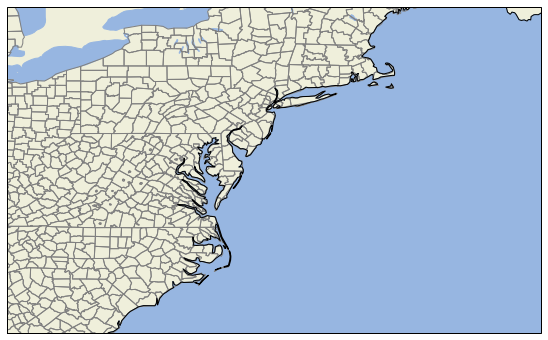

In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
import matplotlib.pyplot as plt


#reader = shpreader.Reader('../other3p/county/countyl010g.shp')
reader = shpreader.Reader('../other3p/uscounties/uscounties.shp')

county_records = list(reader.records())
counties = [r.geometry for r in county_records]

COUNTIES = cfeature.ShapelyFeature(counties, ccrs.PlateCarree())

plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.LAKES.with_scale('50m'))
ax.add_feature(COUNTIES, facecolor='none', edgecolor='gray')

ax.coastlines('50m')

ax.set_extent([-83, -65, 33, 44])
plt.show()

In [3]:
for c in county_records:
    print(c.attributes)

{'NAME': 'Lake of the Woods', 'STATE_NAME': 'Minnesota', 'STATE_FIPS': '27', 'CNTY_FIPS': '077', 'FIPS': '27077'}
{'NAME': 'Ferry', 'STATE_NAME': 'Washington', 'STATE_FIPS': '53', 'CNTY_FIPS': '019', 'FIPS': '53019'}
{'NAME': 'Stevens', 'STATE_NAME': 'Washington', 'STATE_FIPS': '53', 'CNTY_FIPS': '065', 'FIPS': '53065'}
{'NAME': 'Okanogan', 'STATE_NAME': 'Washington', 'STATE_FIPS': '53', 'CNTY_FIPS': '047', 'FIPS': '53047'}
{'NAME': 'Pend Oreille', 'STATE_NAME': 'Washington', 'STATE_FIPS': '53', 'CNTY_FIPS': '051', 'FIPS': '53051'}
{'NAME': 'Boundary', 'STATE_NAME': 'Idaho', 'STATE_FIPS': '16', 'CNTY_FIPS': '021', 'FIPS': '16021'}
{'NAME': 'Lincoln', 'STATE_NAME': 'Montana', 'STATE_FIPS': '30', 'CNTY_FIPS': '053', 'FIPS': '30053'}
{'NAME': 'Flathead', 'STATE_NAME': 'Montana', 'STATE_FIPS': '30', 'CNTY_FIPS': '029', 'FIPS': '30029'}
{'NAME': 'Glacier', 'STATE_NAME': 'Montana', 'STATE_FIPS': '30', 'CNTY_FIPS': '035', 'FIPS': '30035'}
{'NAME': 'Toole', 'STATE_NAME': 'Montana', 'STATE_FIPS

{'NAME': 'Tama', 'STATE_NAME': 'Iowa', 'STATE_FIPS': '19', 'CNTY_FIPS': '171', 'FIPS': '19171'}
{'NAME': 'Thurston', 'STATE_NAME': 'Nebraska', 'STATE_FIPS': '31', 'CNTY_FIPS': '173', 'FIPS': '31173'}
{'NAME': 'Sweetwater', 'STATE_NAME': 'Wyoming', 'STATE_FIPS': '56', 'CNTY_FIPS': '037', 'FIPS': '56037'}
{'NAME': 'Plymouth', 'STATE_NAME': 'Massachusetts', 'STATE_FIPS': '25', 'CNTY_FIPS': '023', 'FIPS': '25023'}
{'NAME': 'Norfolk', 'STATE_NAME': 'Massachusetts', 'STATE_FIPS': '25', 'CNTY_FIPS': '021', 'FIPS': '25021'}
{'NAME': 'Monona', 'STATE_NAME': 'Iowa', 'STATE_FIPS': '19', 'CNTY_FIPS': '133', 'FIPS': '19133'}
{'NAME': 'Crawford', 'STATE_NAME': 'Iowa', 'STATE_FIPS': '19', 'CNTY_FIPS': '047', 'FIPS': '19047'}
{'NAME': 'Carroll', 'STATE_NAME': 'Iowa', 'STATE_FIPS': '19', 'CNTY_FIPS': '027', 'FIPS': '19027'}
{'NAME': 'Greene', 'STATE_NAME': 'Iowa', 'STATE_FIPS': '19', 'CNTY_FIPS': '073', 'FIPS': '19073'}
{'NAME': 'Boone', 'STATE_NAME': 'Iowa', 'STATE_FIPS': '19', 'CNTY_FIPS': '015', 'FI

{'NAME': 'Decatur', 'STATE_NAME': 'Kansas', 'STATE_FIPS': '20', 'CNTY_FIPS': '039', 'FIPS': '20039'}
{'NAME': 'Republic', 'STATE_NAME': 'Kansas', 'STATE_FIPS': '20', 'CNTY_FIPS': '157', 'FIPS': '20157'}
{'NAME': 'Doniphan', 'STATE_NAME': 'Kansas', 'STATE_FIPS': '20', 'CNTY_FIPS': '043', 'FIPS': '20043'}
{'NAME': 'Mendocino', 'STATE_NAME': 'California', 'STATE_FIPS': '06', 'CNTY_FIPS': '045', 'FIPS': '06045'}
{'NAME': 'Smith', 'STATE_NAME': 'Kansas', 'STATE_FIPS': '20', 'CNTY_FIPS': '183', 'FIPS': '20183'}
{'NAME': 'Jewell', 'STATE_NAME': 'Kansas', 'STATE_FIPS': '20', 'CNTY_FIPS': '089', 'FIPS': '20089'}
{'NAME': 'Washington', 'STATE_NAME': 'Kansas', 'STATE_FIPS': '20', 'CNTY_FIPS': '201', 'FIPS': '20201'}
{'NAME': 'Adams', 'STATE_NAME': 'Colorado', 'STATE_FIPS': '08', 'CNTY_FIPS': '001', 'FIPS': '08001'}
{'NAME': 'Nemaha', 'STATE_NAME': 'Kansas', 'STATE_FIPS': '20', 'CNTY_FIPS': '131', 'FIPS': '20131'}
{'NAME': 'Marshall', 'STATE_NAME': 'Kansas', 'STATE_FIPS': '20', 'CNTY_FIPS': '117',

{'NAME': 'St. Clair', 'STATE_NAME': 'Missouri', 'STATE_FIPS': '29', 'CNTY_FIPS': '185', 'FIPS': '29185'}
{'NAME': 'Perry', 'STATE_NAME': 'Illinois', 'STATE_FIPS': '17', 'CNTY_FIPS': '145', 'FIPS': '17145'}
{'NAME': 'Crawford', 'STATE_NAME': 'Missouri', 'STATE_FIPS': '29', 'CNTY_FIPS': '055', 'FIPS': '29055'}
{'NAME': 'Fayette', 'STATE_NAME': 'Kentucky', 'STATE_FIPS': '21', 'CNTY_FIPS': '067', 'FIPS': '21067'}
{'NAME': 'Washington', 'STATE_NAME': 'Missouri', 'STATE_FIPS': '29', 'CNTY_FIPS': '221', 'FIPS': '29221'}
{'NAME': 'Spencer', 'STATE_NAME': 'Indiana', 'STATE_FIPS': '18', 'CNTY_FIPS': '147', 'FIPS': '18147'}
{'NAME': 'Meade', 'STATE_NAME': 'Kentucky', 'STATE_FIPS': '21', 'CNTY_FIPS': '163', 'FIPS': '21163'}
{'NAME': 'Montgomery', 'STATE_NAME': 'Kentucky', 'STATE_FIPS': '21', 'CNTY_FIPS': '173', 'FIPS': '21173'}
{'NAME': 'Woodford', 'STATE_NAME': 'Kentucky', 'STATE_FIPS': '21', 'CNTY_FIPS': '239', 'FIPS': '21239'}
{'NAME': 'Staunton', 'STATE_NAME': 'Virginia', 'STATE_FIPS': '51', '

{'NAME': 'Carlisle', 'STATE_NAME': 'Kentucky', 'STATE_FIPS': '21', 'CNTY_FIPS': '039', 'FIPS': '21039'}
{'NAME': 'Norfolk', 'STATE_NAME': 'Virginia', 'STATE_FIPS': '51', 'CNTY_FIPS': '710', 'FIPS': '51710'}
{'NAME': 'McCreary', 'STATE_NAME': 'Kentucky', 'STATE_FIPS': '21', 'CNTY_FIPS': '147', 'FIPS': '21147'}
{'NAME': 'Bell', 'STATE_NAME': 'Kentucky', 'STATE_FIPS': '21', 'CNTY_FIPS': '013', 'FIPS': '21013'}
{'NAME': 'Norton', 'STATE_NAME': 'Virginia', 'STATE_FIPS': '51', 'CNTY_FIPS': '720', 'FIPS': '51720'}
{'NAME': 'Graves', 'STATE_NAME': 'Kentucky', 'STATE_FIPS': '21', 'CNTY_FIPS': '083', 'FIPS': '21083'}
{'NAME': 'Cumberland', 'STATE_NAME': 'Kentucky', 'STATE_FIPS': '21', 'CNTY_FIPS': '057', 'FIPS': '21057'}
{'NAME': 'Allen', 'STATE_NAME': 'Kentucky', 'STATE_FIPS': '21', 'CNTY_FIPS': '003', 'FIPS': '21003'}
{'NAME': 'Virginia Beach', 'STATE_NAME': 'Virginia', 'STATE_FIPS': '51', 'CNTY_FIPS': '810', 'FIPS': '51810'}
{'NAME': 'Carroll', 'STATE_NAME': 'Virginia', 'STATE_FIPS': '51', 'C

{'NAME': 'Marshall', 'STATE_NAME': 'Mississippi', 'STATE_FIPS': '28', 'CNTY_FIPS': '093', 'FIPS': '28093'}
{'NAME': 'Rabun', 'STATE_NAME': 'Georgia', 'STATE_FIPS': '13', 'CNTY_FIPS': '241', 'FIPS': '13241'}
{'NAME': 'Madison', 'STATE_NAME': 'Alabama', 'STATE_FIPS': '01', 'CNTY_FIPS': '089', 'FIPS': '01089'}
{'NAME': 'Jackson', 'STATE_NAME': 'Alabama', 'STATE_FIPS': '01', 'CNTY_FIPS': '071', 'FIPS': '01071'}
{'NAME': 'Whitfield', 'STATE_NAME': 'Georgia', 'STATE_FIPS': '13', 'CNTY_FIPS': '313', 'FIPS': '13313'}
{'NAME': 'Murray', 'STATE_NAME': 'Georgia', 'STATE_FIPS': '13', 'CNTY_FIPS': '213', 'FIPS': '13213'}
{'NAME': 'Catoosa', 'STATE_NAME': 'Georgia', 'STATE_FIPS': '13', 'CNTY_FIPS': '047', 'FIPS': '13047'}
{'NAME': 'Dade', 'STATE_NAME': 'Georgia', 'STATE_FIPS': '13', 'CNTY_FIPS': '083', 'FIPS': '13083'}
{'NAME': 'Walker', 'STATE_NAME': 'Georgia', 'STATE_FIPS': '13', 'CNTY_FIPS': '295', 'FIPS': '13295'}
{'NAME': 'Towns', 'STATE_NAME': 'Georgia', 'STATE_FIPS': '13', 'CNTY_FIPS': '281',

{'NAME': 'Washington', 'STATE_NAME': 'Georgia', 'STATE_FIPS': '13', 'CNTY_FIPS': '303', 'FIPS': '13303'}
{'NAME': 'Meriwether', 'STATE_NAME': 'Georgia', 'STATE_FIPS': '13', 'CNTY_FIPS': '199', 'FIPS': '13199'}
{'NAME': 'Troup', 'STATE_NAME': 'Georgia', 'STATE_FIPS': '13', 'CNTY_FIPS': '285', 'FIPS': '13285'}
{'NAME': 'Grant', 'STATE_NAME': 'New Mexico', 'STATE_FIPS': '35', 'CNTY_FIPS': '017', 'FIPS': '35017'}
{'NAME': 'Lamar', 'STATE_NAME': 'Georgia', 'STATE_FIPS': '13', 'CNTY_FIPS': '171', 'FIPS': '13171'}
{'NAME': 'Monroe', 'STATE_NAME': 'Georgia', 'STATE_FIPS': '13', 'CNTY_FIPS': '207', 'FIPS': '13207'}
{'NAME': 'Pike', 'STATE_NAME': 'Georgia', 'STATE_FIPS': '13', 'CNTY_FIPS': '231', 'FIPS': '13231'}
{'NAME': 'Baldwin', 'STATE_NAME': 'Georgia', 'STATE_FIPS': '13', 'CNTY_FIPS': '009', 'FIPS': '13009'}
{'NAME': 'Jones', 'STATE_NAME': 'Georgia', 'STATE_FIPS': '13', 'CNTY_FIPS': '169', 'FIPS': '13169'}
{'NAME': 'Colleton', 'STATE_NAME': 'South Carolina', 'STATE_FIPS': '45', 'CNTY_FIPS':

{'NAME': 'Adams', 'STATE_NAME': 'Wisconsin', 'STATE_FIPS': '55', 'CNTY_FIPS': '001', 'FIPS': '55001'}
{'NAME': 'Waushara', 'STATE_NAME': 'Wisconsin', 'STATE_FIPS': '55', 'CNTY_FIPS': '137', 'FIPS': '55137'}
{'NAME': 'Winnebago', 'STATE_NAME': 'Wisconsin', 'STATE_FIPS': '55', 'CNTY_FIPS': '139', 'FIPS': '55139'}
{'NAME': 'Calumet', 'STATE_NAME': 'Wisconsin', 'STATE_FIPS': '55', 'CNTY_FIPS': '015', 'FIPS': '55015'}
{'NAME': 'Lewis', 'STATE_NAME': 'New York', 'STATE_FIPS': '36', 'CNTY_FIPS': '049', 'FIPS': '36049'}
{'NAME': 'Mason', 'STATE_NAME': 'Michigan', 'STATE_FIPS': '26', 'CNTY_FIPS': '105', 'FIPS': '26105'}
{'NAME': 'Lake', 'STATE_NAME': 'Michigan', 'STATE_FIPS': '26', 'CNTY_FIPS': '085', 'FIPS': '26085'}
{'NAME': 'Osceola', 'STATE_NAME': 'Michigan', 'STATE_FIPS': '26', 'CNTY_FIPS': '133', 'FIPS': '26133'}
{'NAME': 'Arenac', 'STATE_NAME': 'Michigan', 'STATE_FIPS': '26', 'CNTY_FIPS': '011', 'FIPS': '26011'}
{'NAME': 'Clare', 'STATE_NAME': 'Michigan', 'STATE_FIPS': '26', 'CNTY_FIPS':

In [4]:
# Load Data
def load_raw(fn):
    datapath = os.path.join('../csse_covid_19_data/csse_covid_19_time_series/', fn)

    #datapath = '../csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
    
    raw = pd.read_csv(datapath)
    #del raw['Lat']
    #del raw['Long']
    #raw= raw.replace('Mainland China','China')
    raw = raw[raw.iso2=='US']
    raw = raw[pd.notnull(raw.UID) & ~(raw.Lat==0.0)]
    # fix HI/AK later
    raw = raw[~(raw.Province_State=='Alaska') & ~(raw.Province_State=='Hawaii')]
    return raw

raw = load_raw('time_series_covid19_confirmed_us.csv')
#raw_deaths = load_raw('time_series_covid19_deaths_global.csv')

raw


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20
5,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,104,103,110,110,120,127,136,143,149,155.0
6,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,243,244,254,254,260,262,270,269,271,273.0
7,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,74,79,79,81,85,90,96,99,104,105.0
8,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,46,49,50,50,50,51,52,52,55,58.0
9,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,45,45,45,46,47,47,47,47,49,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3256,84070016,US,USA,840,NaN,Central Utah,Utah,US,39.372319,-111.575868,...,29,29,29,30,30,30,31,32,34,33.0
3257,84070017,US,USA,840,NaN,Southeast Utah,Utah,US,38.996171,-110.701396,...,13,13,14,14,15,16,16,17,18,18.0
3258,84070018,US,USA,840,NaN,Southwest Utah,Utah,US,37.854472,-111.441876,...,187,200,209,219,236,245,260,271,281,294.0
3259,84070019,US,USA,840,NaN,TriCounty,Utah,US,40.124915,-109.517442,...,16,16,19,19,22,19,20,20,21,20.0


MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


{2050, 2180, 2185, 2060, 2188, 2068, 2070, 2201, 15001, 15003, 15005, 15007, 46113, 15009, 2090, 2220, 2100, 2232, 51515, 2110, 2240, 2122, 2130, 2261, 2013, 2270, 2016, 2020, 2150, 2280, 2282, 2290, 2164, 2170}
{46102, -1}
[1001, 1003, 1005, 1007, 1009, 1011, 1013, 1015, 1017, 1019]
[-1, 1001, 1003, 1005, 1007, 1009, 1011, 1013, 1015, 1017]
242.99999999999994
9.127502093667179 (1.0, 0.12941176470588234, 0.0, 1.0)
74.00000000000003
4.418840607796598 (1.0, 0.580392156862745, 0.0, 1.0)
74.00000000000003
4.418840607796598 (1.0, 0.580392156862745, 0.0, 1.0)
69.00000000000001
4.584967478670572 (1.0, 0.5647058823529412, 0.0, 1.0)
95.0
4.574710978503383 (1.0, 0.5647058823529412, 0.0, 1.0)
159.0
5.0689042022202315 (1.0, 0.5176470588235293, 0.0, 1.0)
219.00000000000003
5.389071729816501 (1.0, 0.4862745098039216, 0.0, 1.0)
270.00000000000006
5.598421958998375 (1.0, 0.4666666666666667, 0.0, 1.0)
316.00000000000006
5.755742213586912 (1.0, 0.4509803921568627, 0.0, 1.0)
304.00000000000006
5.71702770

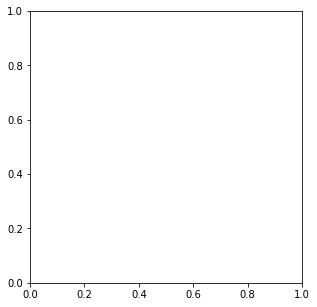

74.00000000000003
4.418840607796598 (1.0, 0.580392156862745, 0.0, 1.0)


In [10]:
#%%capture
%matplotlib inline
from math import log
plt.rcParams["figure.figsize"] = [10, 5]
x=raw['Long_']
y=raw['Lat']
#c=raw['4/19/20'].apply(lambda x: log(x) if x>0 else 0)
weeks = 12
window = 7
dates=raw.columns[-weeks*7:]
#print(dates)
new = [(raw[dates[i]]-raw[dates[i-window]]).apply(lambda x: log(x) if x>0 else 0) for i in range(window,len(dates))]
maxval=max([c.max() for c in new])
#print(c.min(),c.max())
plt.gca().set_aspect('equal', adjustable='box')
fig, ax = plt.subplots()

#plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-83, -65, 33, 44])

fips = raw['FIPS'].fillna(-1).apply(lambda x: int(x))

cty_fips = set([int(r.attributes['FIPS']) for r in county_records])
raw_fips = set(fips)

print(cty_fips.difference(raw_fips))
print(raw_fips.difference(cty_fips))

print(list(sorted(cty_fips))[:10])
print(list(sorted(raw_fips))[:10])

#plt.show()
lookup_0 = dict(zip(list(fips),list(raw['Admin2'])))
test_mapping = zip([r.attributes['NAME'] for r in county_records], [lookup_0[int(r.attributes['FIPS'])] if int(r.attributes['FIPS']) in lookup_0 else 'missing' for r in county_records])
#for (r,l) in test_mapping:
#    print(r,l)

cmap=plt.cm.autumn_r
#norm=plt.Normalize(min(mapping),max(mapping))
norm=plt.Normalize(0,maxval)
    
from math import exp

def plot_map(date_tuple):
    c,dt = date_tuple
    # todo: this could be done outside the call.
    #print(len(fips),len(c))
    lookup = dict(zip(list(fips),c))
    #print(lookup)
    mapping = [lookup[int(r.attributes['FIPS'])] if int(r.attributes['FIPS']) in lookup else 0.0 for r in county_records]
    print(exp(lookup[53033]))
    #print(mapping)
    #print(min(mapping),max(mapping))
    #print(len(mapping),len(COUNTIES))
    #print(dt)
    ax.clear()
    ax.add_feature(cfeature.LAND.with_scale('50m'))
    ax.add_feature(cfeature.OCEAN.with_scale('50m'))
    ax.add_feature(cfeature.LAKES.with_scale('50m'))
    print(max(mapping),cmap(norm(max(mapping))))
    #add_feature(COUNTIES
    ax.add_geometries(counties, ccrs.PlateCarree(), facecolor=list(cmap(norm(mapping))), edgecolor='gray', linewidth=0.1)
    ax.coastlines('50m')

    #ax.scatter(x,y, c=c, alpha=0.5, cmap='autumn_r')
    ax.set_yticks([])
    ax.set_xticks([])
    #ax.set_extent([-76,-72,38,42]) Manhattan
    #ax.set_extent([-83, -65, 33, 44]) Eastern Seaboard
    ax.set_extent([-124,-120,46,49])
    #ax.set_extent([-130,-62,20,50])
    plt.box(False)
    ax.text(0.95, 0.15, dt, transform=ax.transAxes, color='#222222', size=24, ha='right', weight=800)

frames = list(zip(new,dates[window:]))
plot_map(frames[-1])
animator = animation.FuncAnimation(fig, plot_map, frames=frames, repeat=False)
#HTML(animator.to_jshtml()) 

maxDate=raw.columns[-1].replace('/','-')
#animator.save('data/animation-fill-{}.gif'.format(maxDate))
animator.save('data/animation-fill-latest.gif')


In [6]:
fips

5       1001
6       1003
7       1005
8       1007
9       1009
        ... 
3256      -1
3257      -1
3258      -1
3259      -1
3260      -1
Name: FIPS, Length: 3116, dtype: int64